In [45]:
import torch
import matplotlib.pyplot as plt

Задача 1


1). Создайте два вещественных тензора: a размером (3, 4) и b размером (12,)
2). Создайте тензор c, являющийся тензором b, но размера (2, 2, 3)
3). Выведите первый столбец матрицы a с помощью индексации

In [23]:
a = torch.Tensor([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]])
b = torch.Tensor([1,2,3,4,5,6,7,8,9,10,11,12])

In [28]:
c = b.reshape(2,2,3)

In [25]:
a[:,0]

tensor([1., 5., 9.])

Задача 2

1). Создайте два вещественных тензора: a размером (5, 2) и b размером (1,10)
2). Создайте тензор c, являющийся тензором b, но размера (5, 2)
3). Произведите все арифметические операции с тензорами a и c

In [33]:
a = torch.Tensor([[1, 2],
                  [3, 4],
                  [5, 6],
                  [7, 8],
                  [9, 10]])
a.size()

torch.Size([5, 2])

In [30]:
b = torch.Tensor([[1,2,3,4,5,6,7,8,9,10]])
b.size()

torch.Size([1, 10])

In [31]:
c = b.reshape(5,2)
c

tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [34]:
a+c

tensor([[ 2.,  4.],
        [ 6.,  8.],
        [10., 12.],
        [14., 16.],
        [18., 20.]])

In [35]:
a-c

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [36]:
a*c

tensor([[  1.,   4.],
        [  9.,  16.],
        [ 25.,  36.],
        [ 49.,  64.],
        [ 81., 100.]])

In [37]:
a/c

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [38]:
a%c

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

Задача 3


1). Создайте тензор целых чисел images размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями

2). Сделайте так, чтобы у 
i
-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 -- 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите пару примеров с помощоью pylot

3). Посчитайте среднее тензора images по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью pyplot, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью .float(), при отрисовке обратно к int с помощью .int())

In [98]:
images = torch.zeros([100, 200, 200, 3])
for i in range(images.shape[0]):
  images[i,i*2:i*2+2,:,:] = 255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


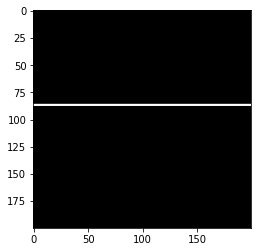

In [99]:
plt.imshow(images[43])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


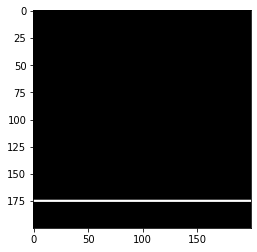

In [100]:
plt.imshow(images[87])

In [107]:
images_float = images.float()
mean_image = images_float.mean(dim=[0])
mean_image *= 70
mean_image = mean_image.int()

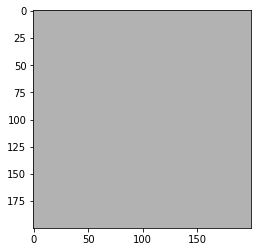

In [109]:
plt.imshow(mean_image.int())

Задача 4


Напишите функцию forward_pass(X, w) (
w
0
 входит в 
w
) для одного нейрона (с сигмоидой) с помощью PyTorch

In [110]:
import numpy as np

In [111]:
def sigmoid(x):
    """Функция сигмоиды"""
    return 1 / (1 + np.exp(-x))

def forward_pass(X, w):
    """
    Рассчитывает ответ нейрона при предъявлении набора объектов
    :param: X -- матрица примеров размера (n, m), каждая строка - отдельный объект
    :return: вектор размера (n, 1) с ответами нейрона 
    """
    n = X.shape[0]
    y_pred = np.zeros((n, 1))  # y_pred == y_predicted - предсказанные классы
    for i in range(n):
        w_dot_X = w.T @ X[i]
        y_pred[i] = sigmoid(x=w_dot_X) 
    return y_pred

In [115]:
X = np.array([[1,3,4,3,-2],
              [1,5,8,7,1],
              [1,-2,-3,8,2],
              [1,-5,-6,-3,-2],
              [1,-2,5,6,-1],])
w = np.array([0.5,0.2,-0.01,0.002,-0.4])

pred = forward_pass(X,w)
pred

array([[0.86599477],
       [0.73769064],
       [0.34208871],
       [0.58758723],
       [0.61348852]])